In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import datetime

In [3]:
df_GDP=pd.read_csv('GDP.csv')
df_M1US=pd.read_csv('M1US.csv')
df_M1V=pd.read_csv('M1V.csv')
df_M2US=pd.read_csv('M2US.csv')
df_M2V=pd.read_csv('M2V.csv')
df_M3US=pd.read_csv('M3US.csv')

def to_datetime(df):
    df.DATE=pd.to_datetime(df.DATE)
    return df

df_GDP=to_datetime(df_GDP)
df_M1US=to_datetime(df_M1US)
df_M1V=to_datetime(df_M1V)
df_M2US=to_datetime(df_M2US)
df_M2V=to_datetime(df_M2V)
df_M3US=to_datetime(df_M3US)


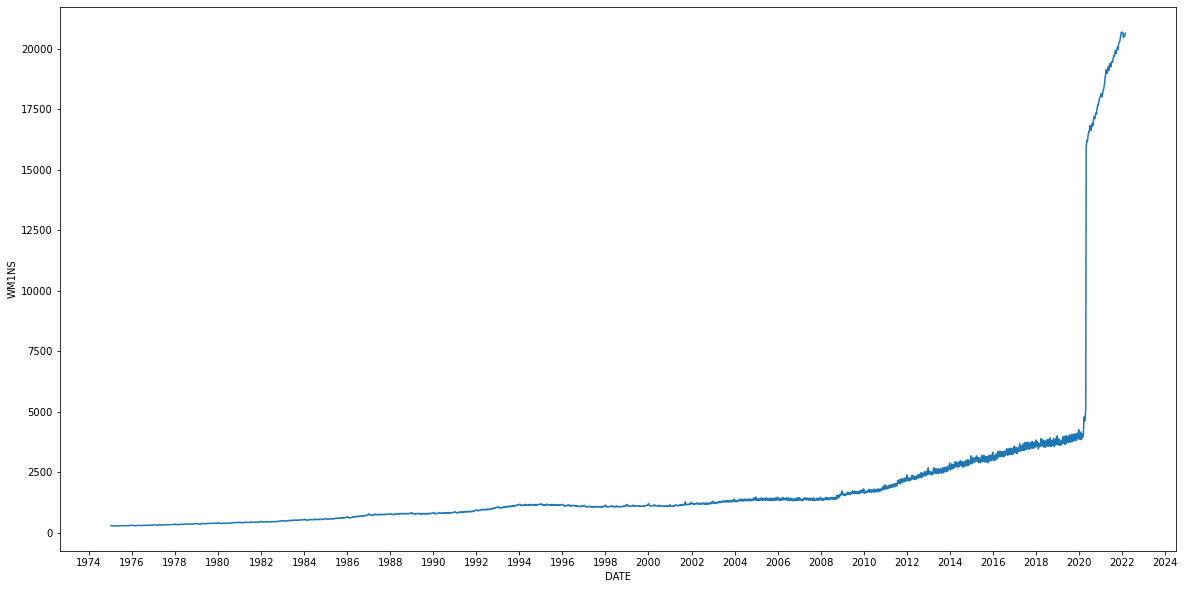

In [4]:
a=plt.figure(figsize=(20,10))
a=sns.lineplot(df_M1US.DATE,df_M1US.WM1NS)
a.xaxis.set_major_locator(mdates.YearLocator(base=2))
a.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.show()

In [5]:
type(df_GDP.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
def filler(date_col,entity_col):
    i=0
    while i<len(date_col):
        days_diff=date_col[i+1]-date_col[i]
        days_delta=days_diff.days
        value_delta=entity_col[i+1]-entity_col[i]
        value_delta_time=value_delta/days_delta
        


filler(df_GDP.DATE,df_GDP.GDP)

